<a href="https://colab.research.google.com/github/abhi147p/Umpire_Gesture_Recognition/blob/main/CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/destination_data/

/content/drive/MyDrive/destination_data


In [3]:
%ls

test_data/  train_data/


In [4]:
# importing the required libraries
import os
import glob as gb
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.image as implt
from tqdm import tqdm

In [6]:
train_path, test_path = 'train_data', 'test_data'

In [7]:
print('====================> Train Data <========================')
for folder in os.listdir(train_path):
    trainFiles=gb.glob(pathname=train_path + '/' + folder +'/*.jpg')
    print(f'{len(trainFiles):4} images are founnd in {folder} folder.')

====================> Train Data <========================
 154 images are founnd in wide folder.
  11 images are founnd in leg_byes folder.
 148 images are founnd in no_ball folder.
 105 images are founnd in six folder.
  95 images are founnd in no_action folder.
 102 images are founnd in out folder.


In [8]:
# initializing the class variables

class_names = ['wide', 'six', 'out', 'four', 'no_ball', 'byes', 'leg_byes', 'no_action']
class_labels = {class_names[i]:i for i in range(len(class_names))}
class_labels

{'wide': 0,
 'six': 1,
 'out': 2,
 'four': 3,
 'no_ball': 4,
 'byes': 5,
 'leg_byes': 6,
 'no_action': 7}

In [17]:
# Loading the dataset

def loading_dataset(data_dir_path):
    images, labels = [], []
    for class_name in class_names:
      try:
          file_path = os.path.join(data_dir_path, class_name)
          # print(type(os.listdir(file_path)))
          for img in os.listdir(file_path):
              img_array = cv2.imread(os.path.join(file_path,img))
              img_array = cv2.resize(img_array,(50,50))
              images.append(img_array)
              labels.append(class_labels[class_name])
      except Exception as ex:
        continue

    images, labels = np.array(images), np.array(labels)
    return (images,labels)

In [18]:
# Loading the dataset of trained and tested
(X_train,Y_train) = loading_dataset(train_path)
# (X_test,Y_test) = loading_dataset(test_path)

print('Total Number of Train images = '+ str(Y_train.shape[0]))
# print('Total Number of Test images = '+ str(Y_test.shape[0]))

Total Number of Train images = 615


In [19]:
#visualizing the sample images

def visualize_sample_images(X, Y):

    fig,ax = plt.subplots(3,3,figsize = (8,8))
    for i in range(3):
        for j in range(3):
            index = np.random.randint(X.shape[0])
            ax[i][j].imshow(X[index])
            ax[i][j].set_title(class_names[Y[index]])

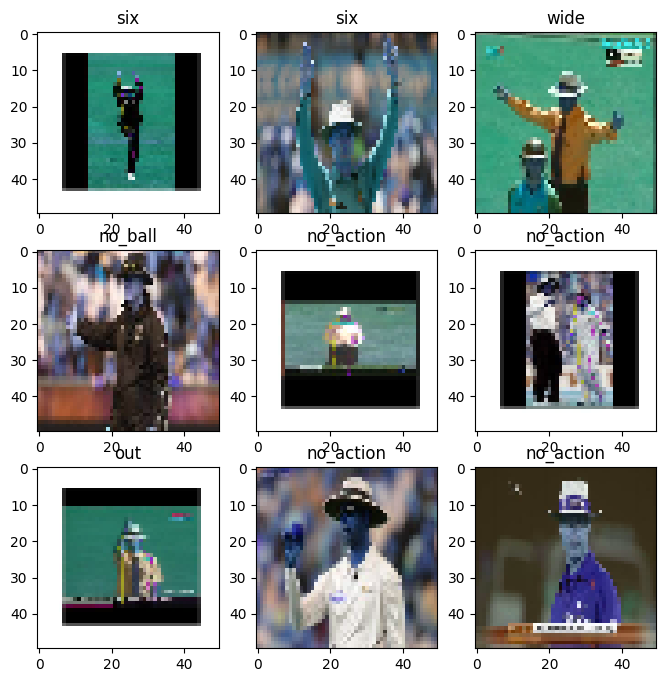

In [20]:
#visualizing the sample training images

visualize_sample_images(X_train, Y_train)

In [26]:
set(list(Y_train))

{0, 1, 2, 4, 6, 7}

In [27]:
labels_uniq = set(list(Y_train))
class_labels_new = {}
for key, value in class_labels.items():
  if value in labels_uniq:
    class_labels_new[key] = value
class_labels_new

{'wide': 0, 'six': 1, 'out': 2, 'no_ball': 4, 'leg_byes': 6, 'no_action': 7}

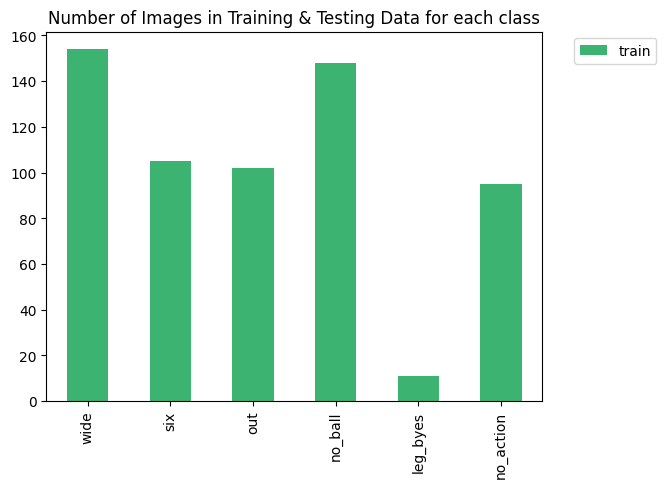

In [28]:
# Visualizing the boxplot for data for train, test for each class label

datatrain, CountTrainImag = np.unique(Y_train, return_counts=True)
#datatest, CountTestImag = np.unique(Y_test, return_counts=True)
pd.DataFrame({'train': CountTrainImag}, index=class_labels_new).plot.bar(color={'train':'mediumseagreen'})
plt.title('Number of Images in Training & Testing Data for each class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

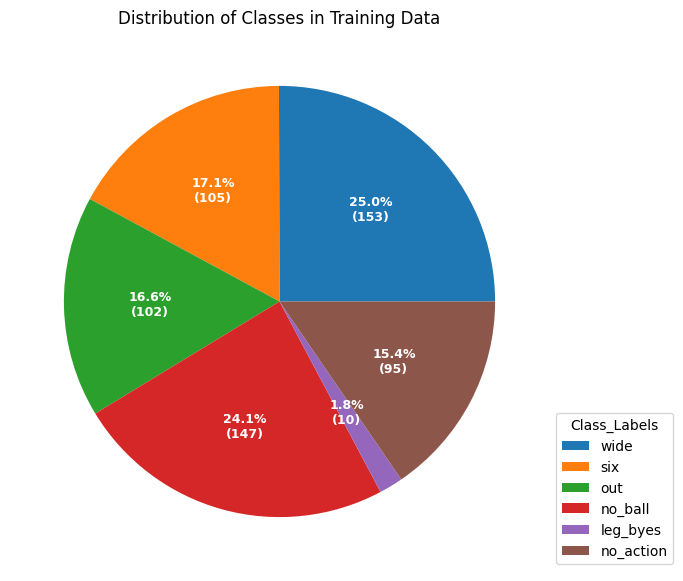

In [29]:
# Visualizing the pie chart data visualization for training data

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(9, 7), subplot_kw=dict(aspect="equal"))

class_names = list(class_labels_new.keys())
count_train = list(CountTrainImag)

popln_pct, texts, autotexts = ax.pie(count_train, autopct=lambda pct: func(pct, count_train),
                                  textprops=dict(color="w"))

ax.legend(popln_pct, class_names,
          title="Class_Labels",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Distribution of Classes in Training Data")

plt.show()

In [30]:
# Rescaling the images

X_train = X_train/255.0

In [31]:
# importing the Keras models libraries for implementation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

In [32]:
# CNN Model

def CNN_Model():
    model = Sequential([
        Conv2D(filters=200, kernel_size=(3, 3), input_shape=(50, 50, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(filters=150, kernel_size=(3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(units=150, activation='relu'),
        Dense(units=100, activation='relu'),
        Dense(units=70, activation='relu'),
        Dense(units=50, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])

    return model

In [33]:
cnn_model = CNN_Model()